# IRIS Dataset - Exploratory Data Analysis and ML Model

## 1. Retrieving Data

In [143]:
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
df = pd.read_csv("D:\Data Science\Kaggle\Iris\Iris.csv")

In [145]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [146]:
df.shape

(150, 6)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [148]:
df.columns = ['Id', 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
df.head()

,Id,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Observation

1. The dataset consists of 150 rows with 6 columns
2. There are 4 columns with continuous data and one column with Categorical data
        Categorical = Species
        Continous   = Sepal Length, Sepal Width, Petal Length, Petal Width
3. The Sepal Length, Sepal Width, Petal Length, and Petal Width columns have float values

## 2. Data Cleaning

## 2.1 Check for duplicate or unnecessary data

In [149]:
df=df.drop(['Id'], axis=1)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [150]:
df.duplicated(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], keep="first")

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [151]:
duplicateRows=df[df.duplicated(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width','Species'])]
duplicateRows

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [152]:
df.drop_duplicates(inplace=True)

In [153]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [154]:
df.shape

(147, 5)

### Result - Checking for duplicate or unnecessary data

1. There are 3 duplicate rows found.
2. The identified duplicate rows are removed
3. Since there are no duplicate columns found, the column 'ID' is also dropped 

### 2.2 Check for missing values and handle them

In [155]:
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

### Observation - Check for missing values

There are no missing in the whole dataset

### 2.3 Check for Outliers and handle them

I have four numerical data (Sepal Length, Sepal Width, Petal Length, and Petal Width), so I will try to find outliers from these columns using histogram and boxplot.

In [257]:
# Descriptive analysis of numerical data
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


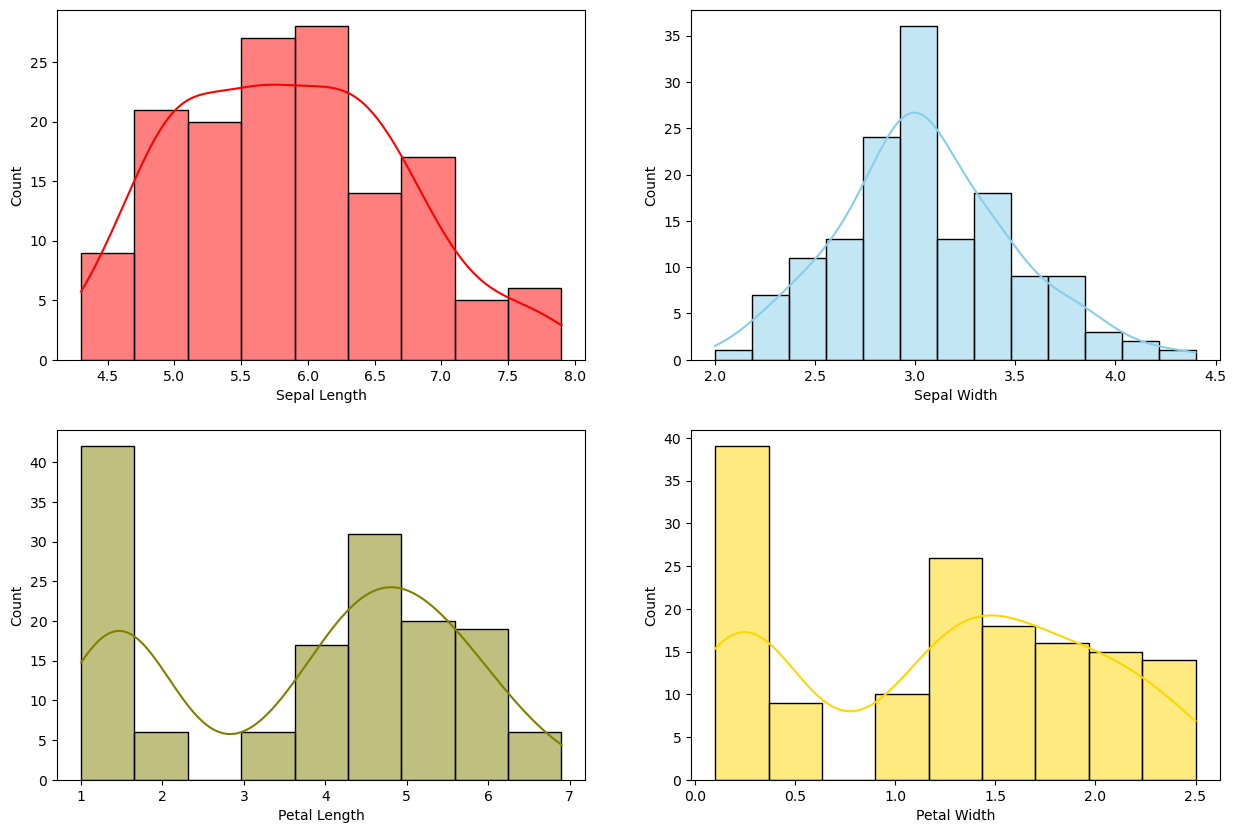

In [173]:
# Create histogram for numerical variable
fig, axs = plt.subplots(2,2, figsize=(15, 10))
      
sns.histplot(data= df, x="Sepal Length", kde=True,color="red", ax=axs[0,0])
sns.histplot(data= df, x="Sepal Width", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= df, x="Petal Length", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= df, x="Petal Width", kde=True, color="gold", ax=axs[1,1])

plt.show()

<AxesSubplot:xlabel='Petal Width'>

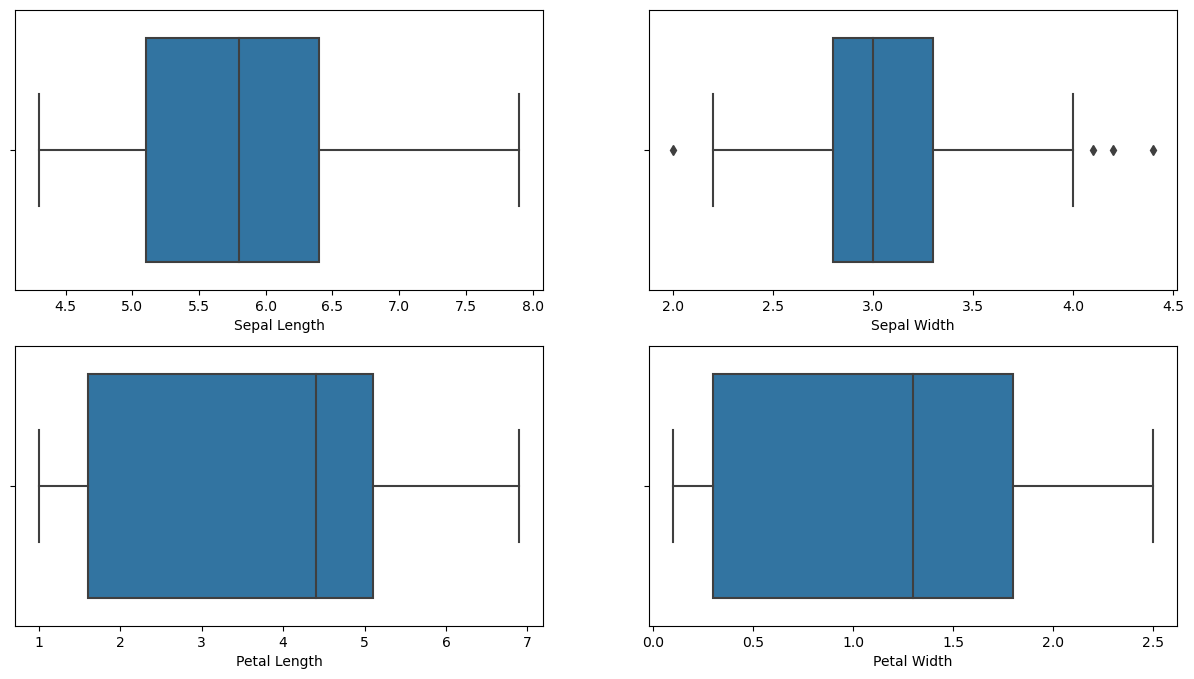

In [158]:
# Create boxplot to observe distribution of numerical value
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data= df, x="Sepal Length", ax = axs[0,0])
sns.boxplot(data= df, x="Sepal Width", ax = axs[0,1])
sns.boxplot(data=df, x="Petal Length", ax = axs[1,0])
sns.boxplot(data=df, x="Petal Width", ax = axs[1,1])

In [160]:
# Sepal Width
qh25, qh50, qh75 = np.percentile(df['Sepal Width'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

#Choose the data inside IQR
data = df[(df['Sepal Width'] > minh) & (df['Sepal Width'] < maxh)]

<AxesSubplot:xlabel='Sepal Width'>

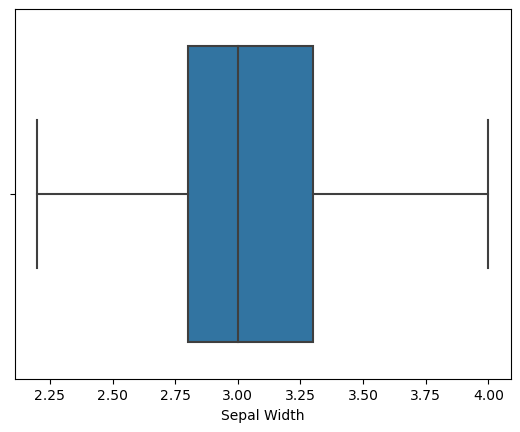

In [161]:
sns.boxplot(data= data, x="Sepal Width")

In [ ]:
data.shape

### Observation -  Check for Outliers and handle them

1. There are no ouliers found in Sepal Length, Petal Length, and Petal Width
2. The Sepal Width has ouliers in them
3. The outliers are removed using IQR values. The box plot is plotted after removing the outliers

## 3. Feature Engineering
### 3.1 One hot encoding for categorical data

    Since all the independent variables are numerical, there is no need of performing one hot encoding

### 3.2 Log transform of skewed variables

In [164]:
# Descriptive analysis of numerical data

df[numerical].head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [166]:
numerical = df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
skew_limit = 0.75 
skew_vals = numerical.skew()
skew_vals

Sepal Length    0.292560
Sepal Width     0.324351
Petal Length   -0.293763
Petal Width    -0.113479
dtype: float64

In [258]:
kurt_vals = numerical.kurtosis()
kurt_vals

Sepal Length   -0.556956
Sepal Width     0.246838
Petal Length   -1.374462
Petal Width    -1.317760
dtype: float64

### Observation - Log transform of skewed variables

In my data, I don't have variable with skew limit more than 0.75

### Skewness:
--------------
Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

Based on the skewness values, it is observed that 
    
    1. For Sepal Length and Sepal Width, skewness > 0, so it is positively skewed. Which means more weight in the left tail of the distribution.
    2. For Petal Length and Petal Width, skewness < 0, so it is negatively skewed. Which means more weight in the right tail of the distribution.
    
### Kurtosis:
-------------
kurtosis for normal distribution is equal to 3.
For a distribution having kurtosis < 3: It is called playkurtic and it signifies that the outliers are infrequent.
For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.

Based on the kutosis values, it is observed that 
    
      Kurtosis values of Sepal Length, Sepal Width, Petal Length and Petal Width are less than 3. So there are low chance of getting outliers.

### 3.3 Pairplot Feature

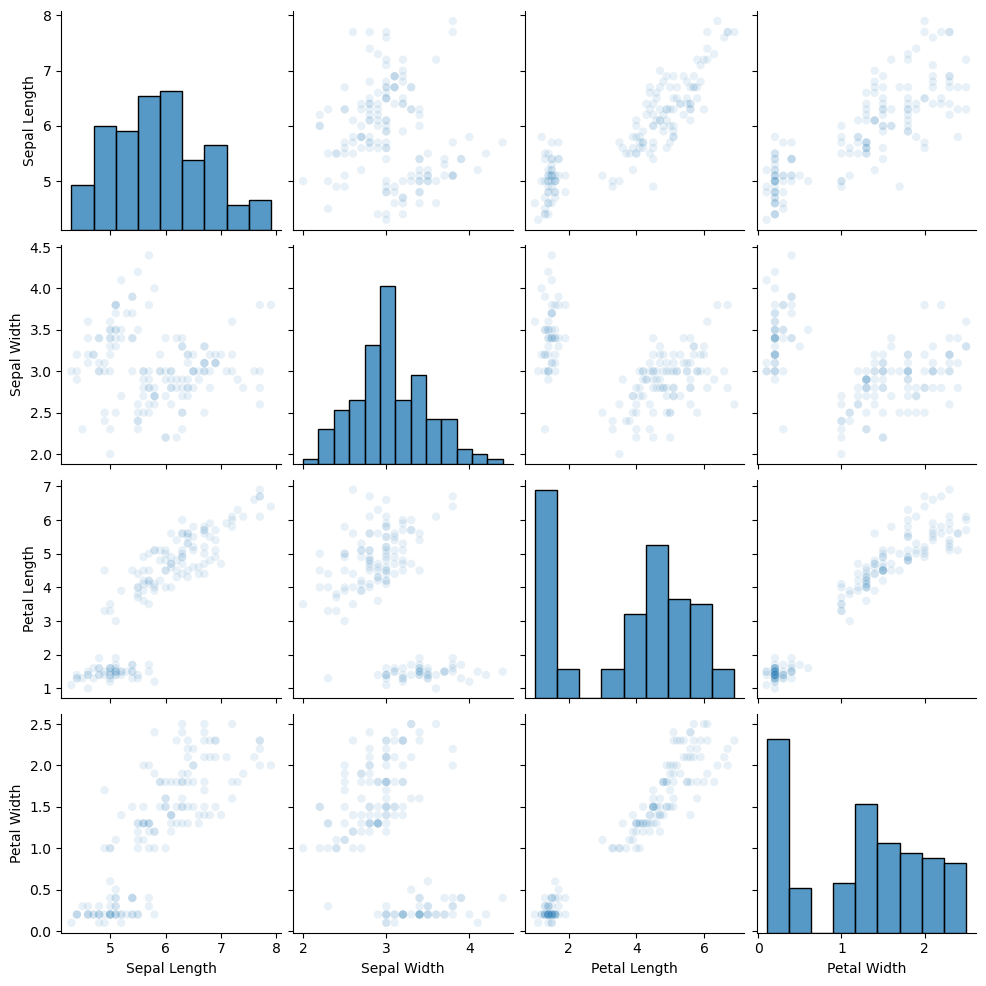

In [167]:
# Pairplot of numerical variables
sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none'))

In [168]:
df.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109321,0.871305,0.817058
Sepal Width,-0.109321,1.000000,-0.421057,-0.356376
Petal Length,0.871305,-0.421057,1.000000,0.961883
Petal Width,0.817058,-0.356376,0.961883,1.000000


Observation:
      
    1. Correlation between Sepal width and Sepal length = -0.109321 (This implies it has very weak negative correlation)
    2. Correlation between Sepal length and Petal length = 0.871305 (This implies it has very strong positive correlation)
    3. Correlation between Sepal length and Petal width = 0.817058 (This implies it has very strong positive correlation)
    4. Correlation between Sepal width and Petal length = -0.421057 (This implies it has moderate negative correlation)
    5. Correlation between Sepal width and Petal width = -0.356376 (This implies it has moderate negative correlation)
    6. Correlation between Petal width and Petal length = 0.961883 (This implies it has very strong positive correlation)

<AxesSubplot:>

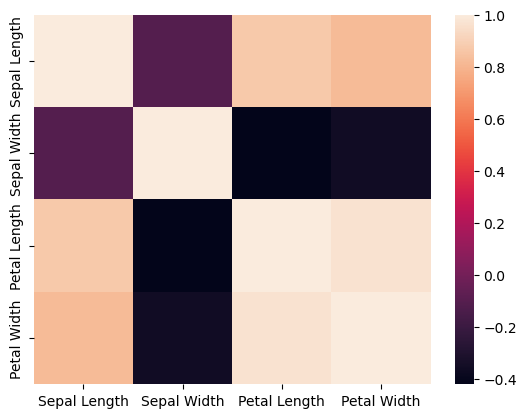

In [174]:
sns.heatmap(df.corr())

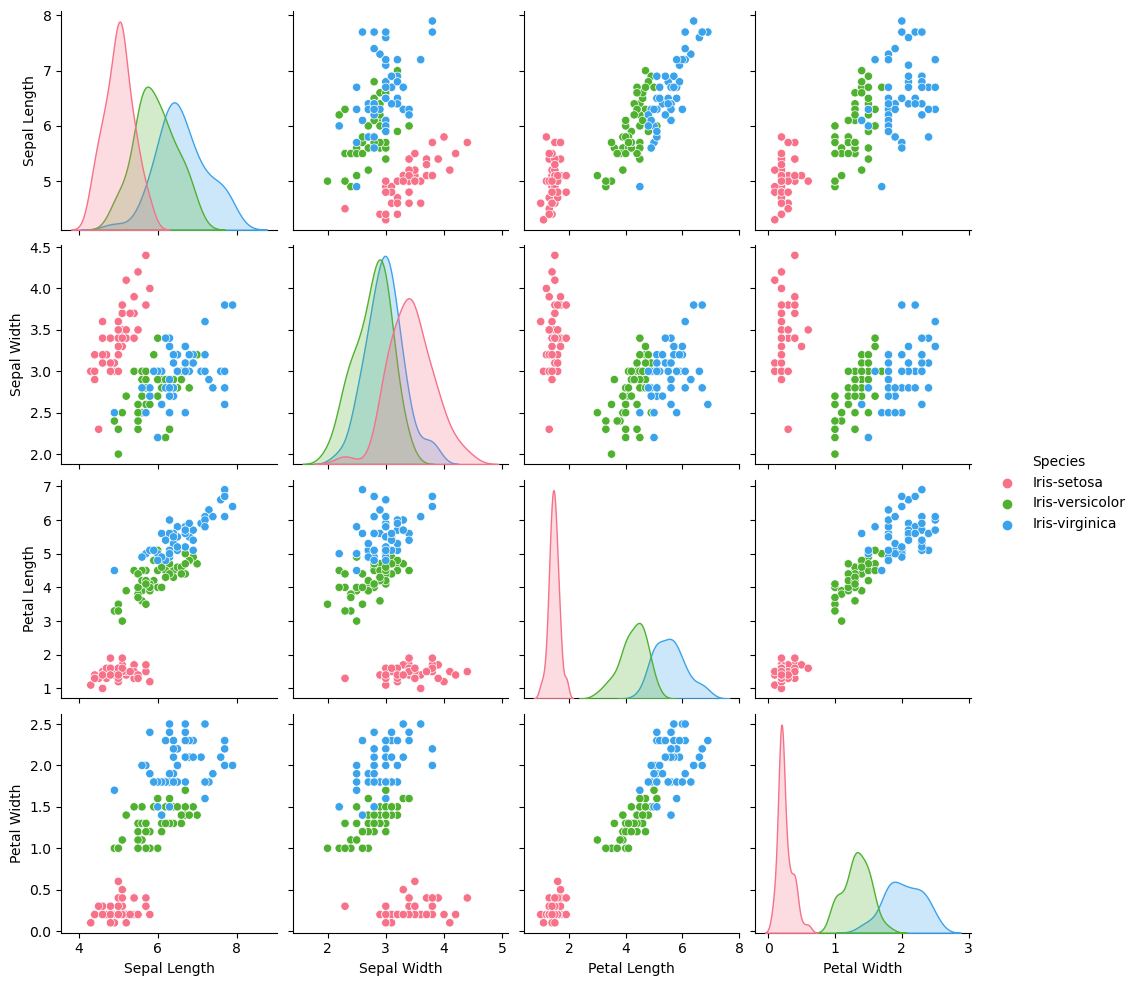

In [170]:
# Pairplot of numerical variables divided by Species
sns.pairplot(df, hue = 'Species', palette = 'husl')

Observation:

    When comparing with the three species based on petal length and petal width 
        1. The longer petal length and petal width is found in Iris-virginica species.  
        2. The second longer petal length and petal width is found in Iris-versicolor species.  
        3. The shorter petal length and petal width is found in Iris-versicolor species.  
    
    When comparing with the three species based on sepal length and petal length
       1. The longer sepal length and petal length is found in Iris-virginica species.  
       2. The second longer sepal length and petal length is found in Iris-versicolor species.  
       3. The shorter sepal length and petal length is found in Iris-versicolor species.  
    
    When comparing with the three species based on Sepal length and Petal width
       1. The longer Sepal length and Petal width is found in Iris-virginica species.  
       2. The second longer Sepal length and Petal width is found in Iris-versicolor species.  
       3. The shorter Sepal length and Petal width is found in Iris-versicolor species.  
------------------------------------
Observation: (Based on Sepal Width only)
    
    1. The sepal width of Iris-setosa is very high when compared with other 2 species.
    2. The Iris-setosa has smaller sepal length but higher sepal width.
    3. Compared to Iris-setosa, the other 2 species has longer sepal length but smaller sepal width 

### Observation

Based on the above analysis and graphs it can be understood that Iris_setosa species has small flowers when compared with Iris_Virginica and Iris-versicolor species whereaas the Iris-virginica species has big flowers when compared to other 2 species.

## 4. ML Modelling using Logistic Regression

### 4.1. Extracting the independent variable as 'X' and dependent variable as 'Y'

In [185]:
X = df.iloc[:,0:4].values
Y = df.iloc[:,4].values

### 4.2. Splitting the dataset into training set and test set

In [251]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.50,random_state=0)

### 4.3. Fitting logistic regression to training dataset

In [252]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

### 4.4. Predicting the test set results

In [253]:
y_pred = classifier.predict(x_test)

### 4.5. Calculating the classification accuracy

In [254]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print("Classification accuracy=",round((acc*100),2),'%')

Classification accuracy= 98.65 %


### 4.6. Generating the classification report

In [245]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       1.00      0.96      0.98        27
 Iris-virginica       0.96      1.00      0.98        26

       accuracy                           0.99        74
      macro avg       0.99      0.99      0.99        74
   weighted avg       0.99      0.99      0.99        74



### 5. Summary

        The Exploratory data analysis is done on Iris dataset and some cleaning processes like removing duplicate values, handling outliers are done. Correlation coefficient is calculated and plotted as heatmap to understand the correlation between the numerical values. Based on the analysis of numerical columns which includes sepal length, sepal width, petal length and petal width, it is understood that the Iris_setosa species has a small flowers when compared to Iris_Virginica and Iris-versicolor species whereaas the Iris-virginica species has big flowers when compared to other 2 species.
    
        The Logistic Regression ML model is also applied and the classification accuracy is found to be 98.65% when considering test set size and train set size as 50%. Furthermore, the dataset can also be analyzed with many other analysis and other ML model can also be applied. This is done as part of my learning process. Tq